In [1]:
from power_spectrum import *
%matplotlib inline

In [2]:
nsims_train = 10**5
nsims_test = 10**3

p_train = rand(nsims_train,2)
p_test = rand(nsims_test, 2)

batch_size = 32

def spectral_index(params):
    def f(k):
        if k==0:
            return zeros(len(params))
        return k**(-4*params)
    return f

sims = lambda p: standardise_ps(fast_gaussian(spectral_index(p[:,0]), fnl=10.**(6*p[:,1]-3)), lambda x: 1,ps=True)

In [3]:
from ipywidgets import interactive

def plot_field(x):
    m = amax(abs(x))
    imshow(x, vmin=-m, vmax=m, cmap="bwr")
    colorbar()

interactive(lambda spec_ind, f_nl: plot_field(sims(np.array([[spec_ind,f_nl]]))[0][0]), spec_ind=(0.,1.), f_nl=(0.,1))

interactive(children=(FloatSlider(value=0.5, description='spec_ind', max=1.0), FloatSlider(value=0.5, descript…

In [4]:
import time

start = time.time()

x_train,edges,ps_train = sims(p_train)
x_test,edges,ps_test = sims(p_test)

time.time()-start

/global/u2/a/avirukt/proj/power_spectrum.py:153: RuntimeWarning: invalid value encountered in true_divide
  field /= k2
/global/u2/a/avirukt/proj/power_spectrum.py:315: RuntimeWarning: divide by zero encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:315: RuntimeWarning: invalid value encountered in multiply
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:153: RuntimeWarning: invalid value encountered in true_divide
  field /= k2
/global/u2/a/avirukt/proj/power_spectrum.py:315: RuntimeWarning: divide by zero encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:315: RuntimeWarning: invalid value encountered in multiply
  x *= sqrt(new/current)


32.8022735118866

In [5]:
pretrained_model = LFI(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnl3')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnl3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aaaef0ef240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
post = pretrained_model.plot_posteriors(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


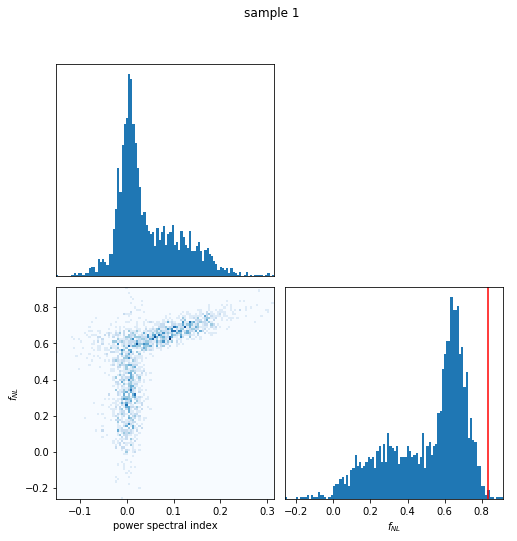

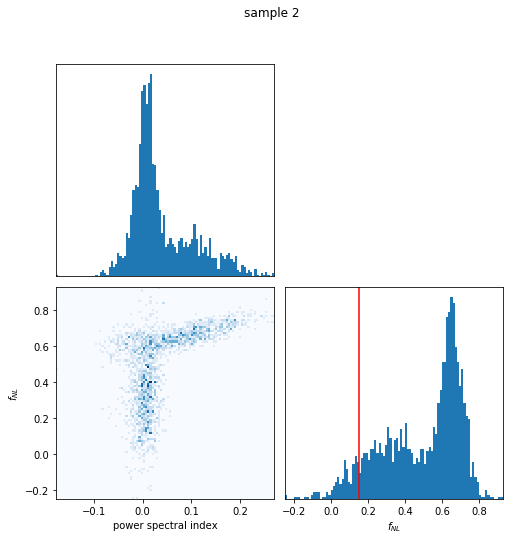

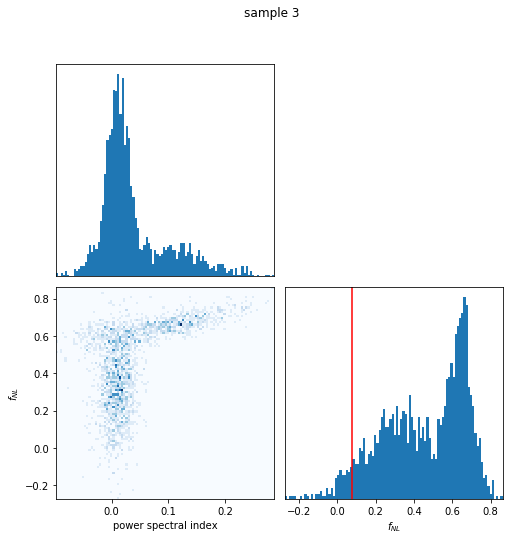

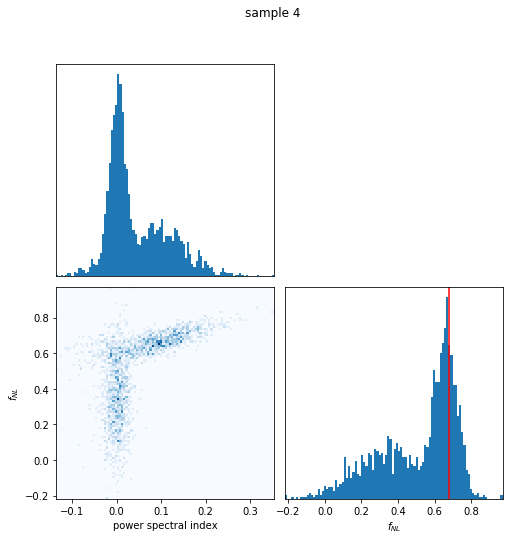

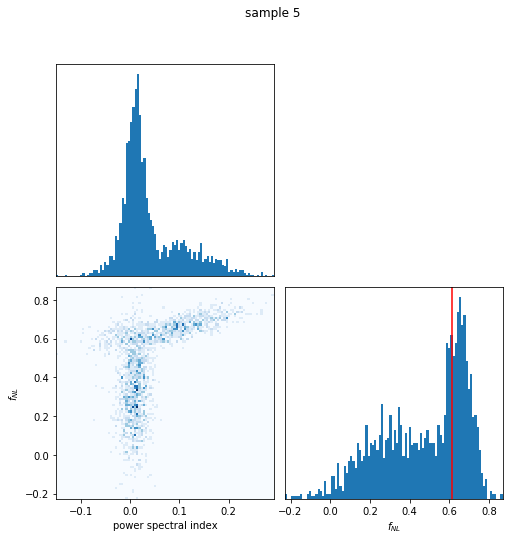

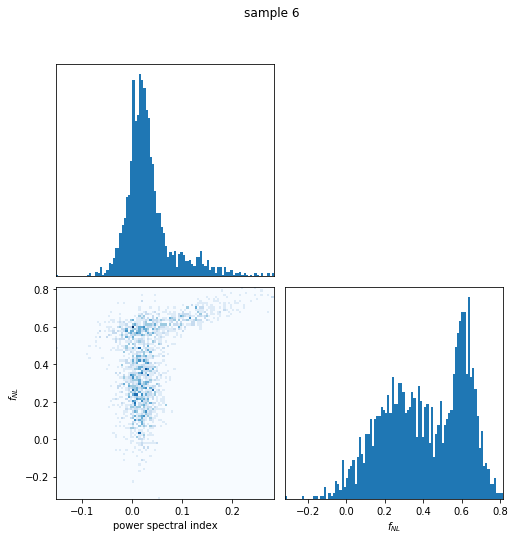

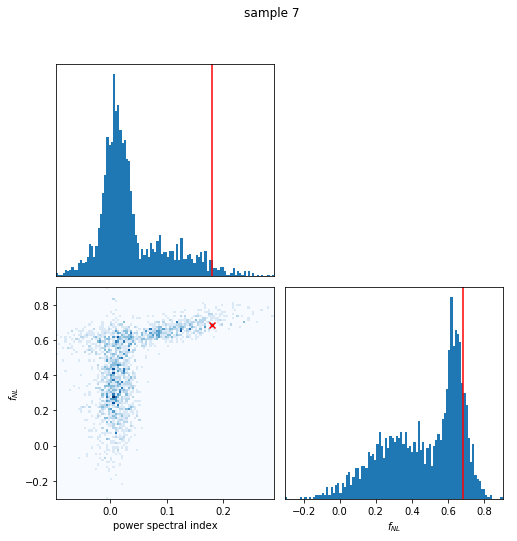

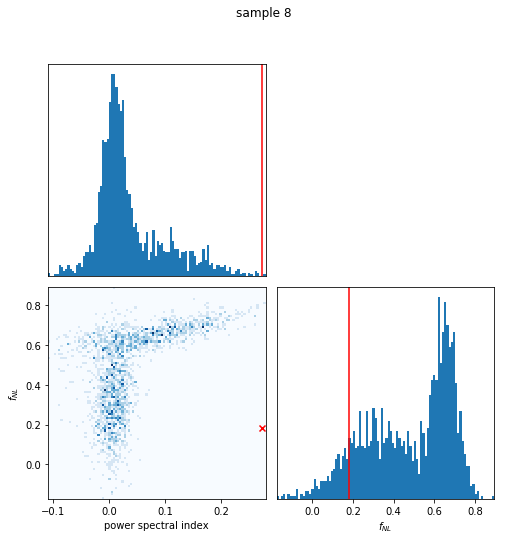

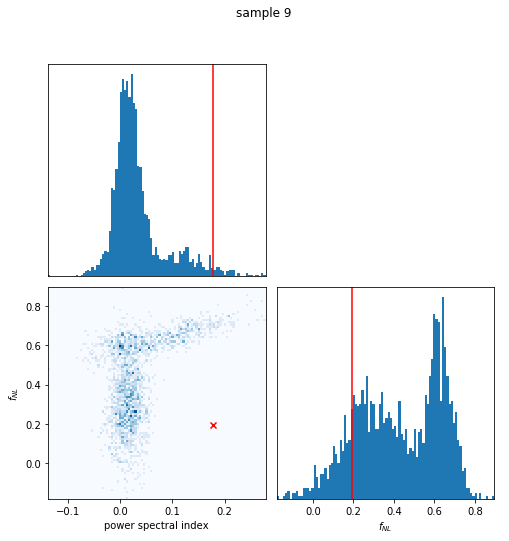

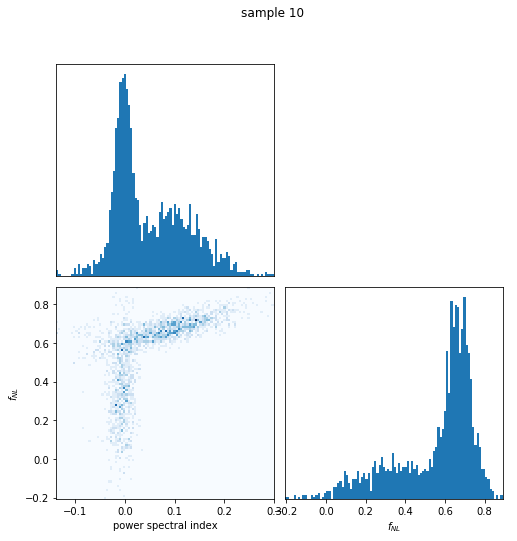

In [7]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


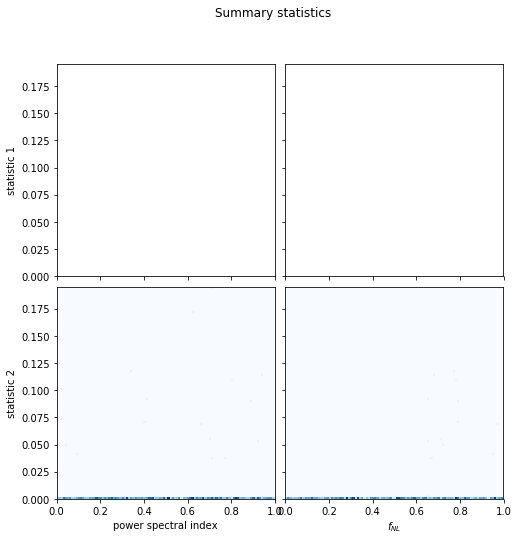

In [8]:
pretrained_model.plot_summaries(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


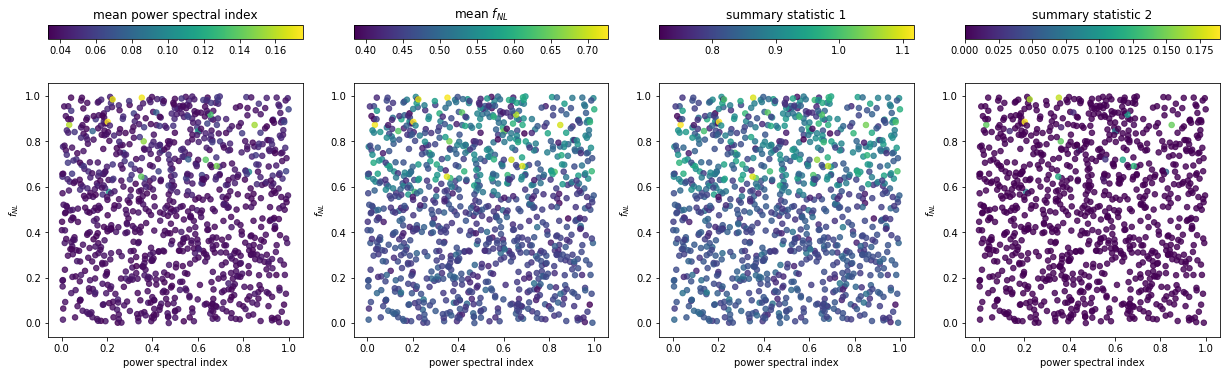

In [6]:
pretrained_model.plot_2d(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnl3/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


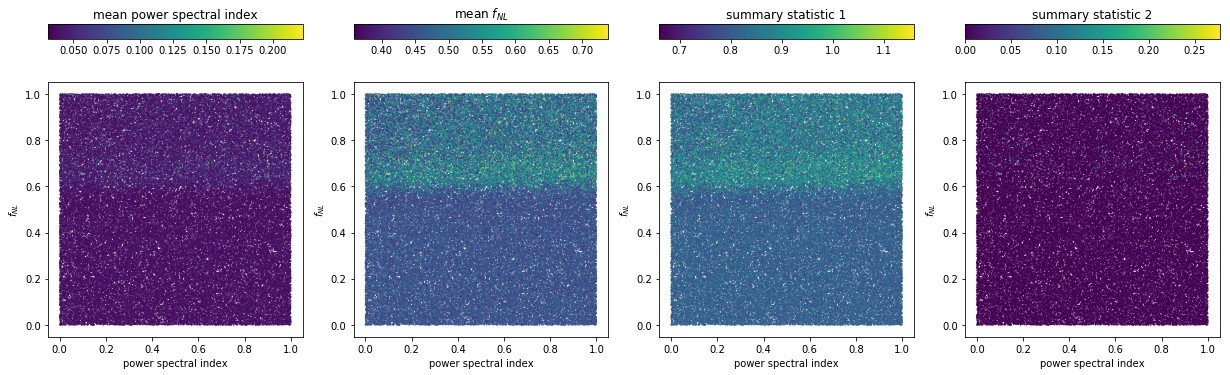

In [7]:
pretrained_model.plot_2d(x_train,p_train)

In [11]:
from ipywidgets import interact_manual

def posteriors(n,spec_ind,f_nl):
    p = array([(spec_ind,f_nl)]*n)
    x = sims(p)
    for g in pretrained_model.plot_posteriors(x,p):
        pass

interact_manual(posteriors, n=(1,10), spec_ind=(0,1,0.01), f_nl=(0,1,0.01))

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), FloatSlider(value=0.0, description='…

<function __main__.posteriors(n, spec_ind, f_nl)>

In [8]:
model = LFI(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnls1')
model.train(training_fn_generator(x_train, p_train), max_steps=20*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnls1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aaaf3c81710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Skipping training since max_steps has already saved.


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


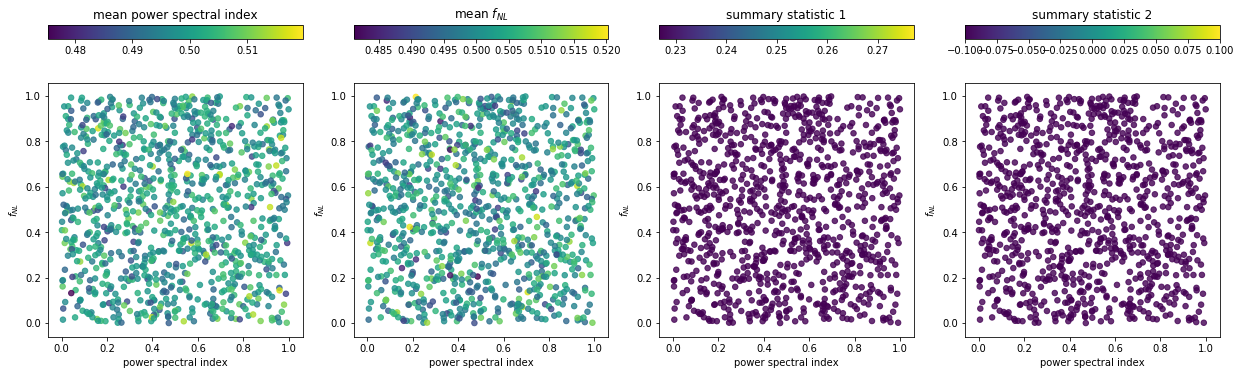

In [9]:
model.plot_2d(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


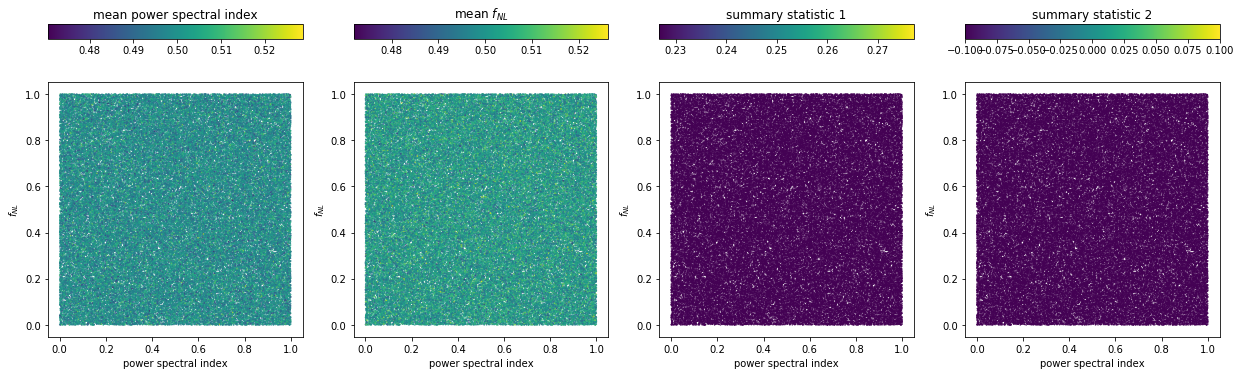

In [10]:
model.plot_2d(x_train,p_train)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


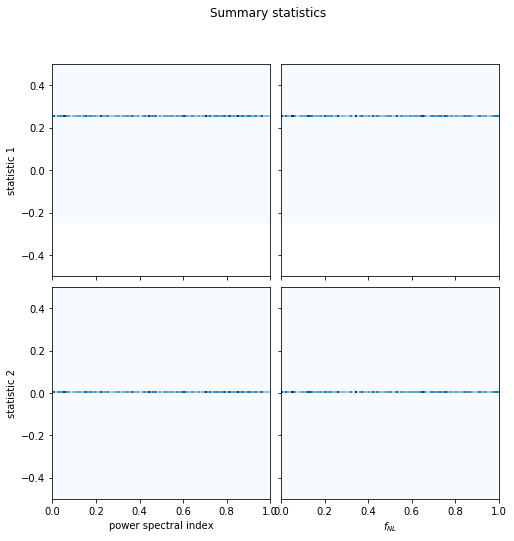

In [11]:
model.plot_summaries(x_test,p_test)

In [13]:
post = model.plot_posteriors(x_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnls1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


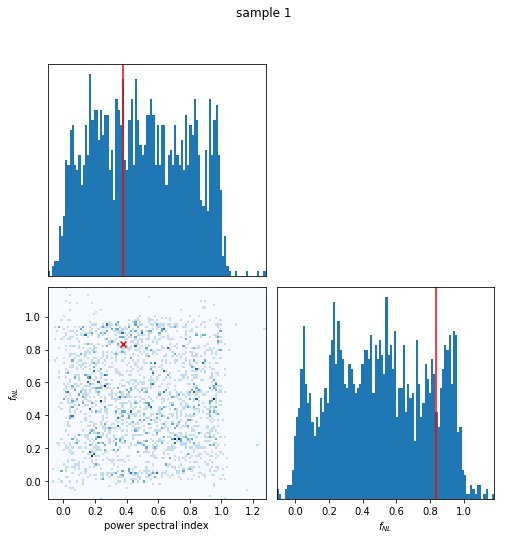

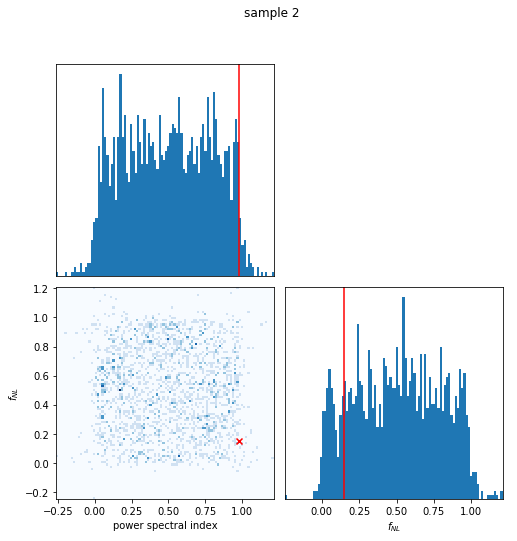

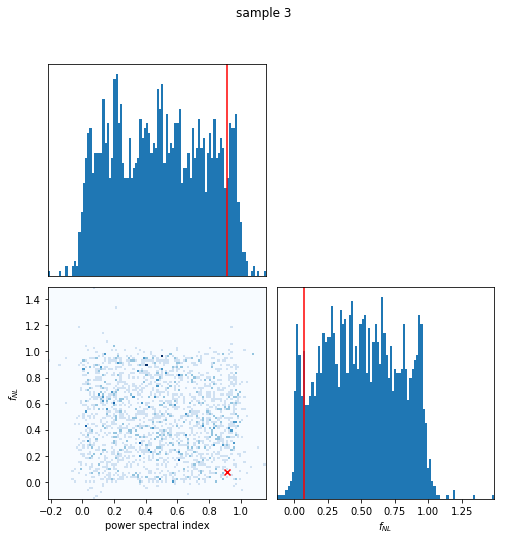

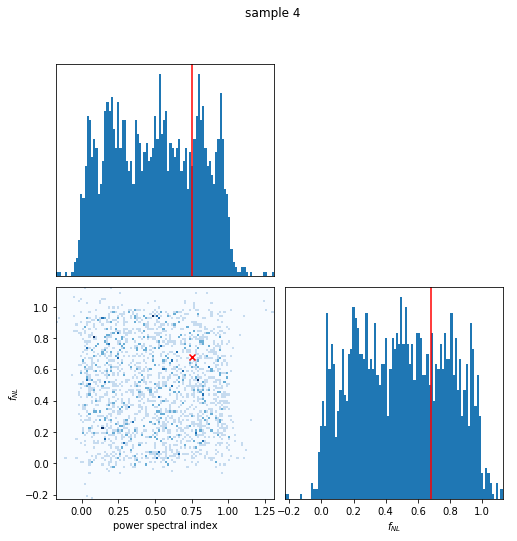

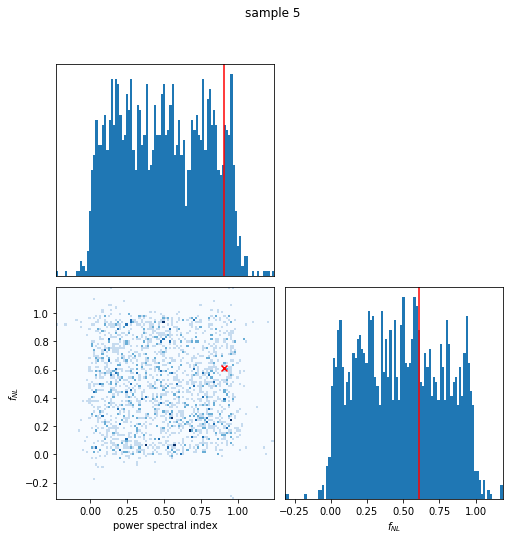

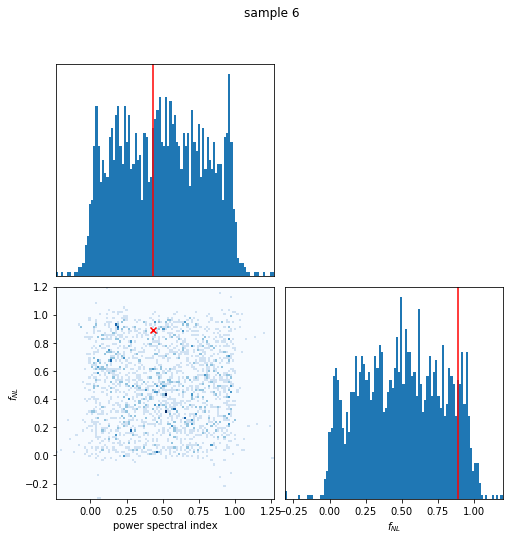

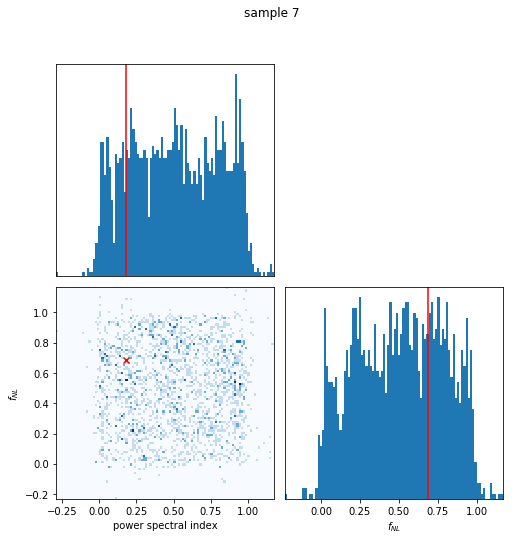

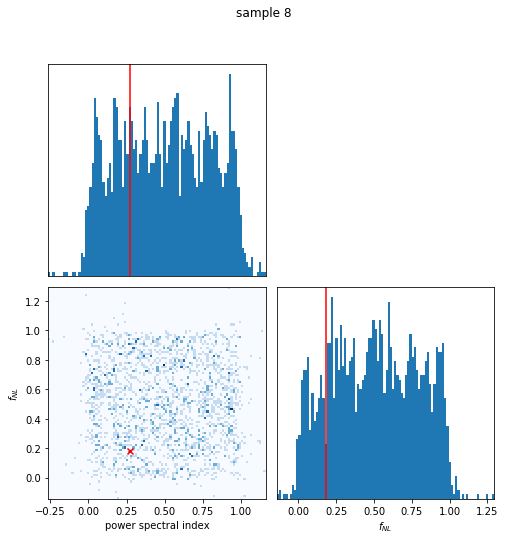

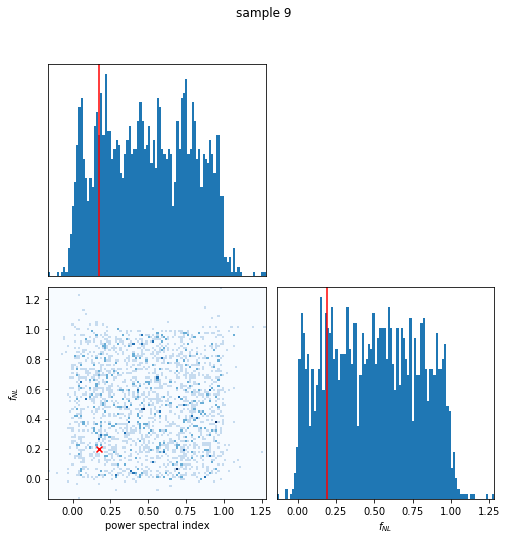

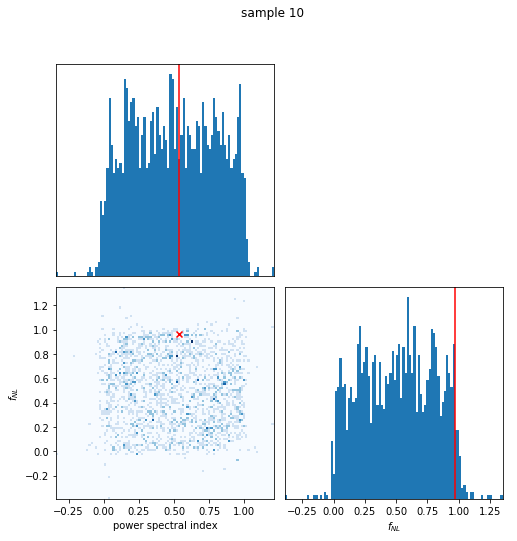

In [14]:
for i in range(10):
    next(post)

In [11]:
ps_model = LFI(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnlps1')
ps_model.train(training_fn_generator(ps_train,p_train), max_steps=20*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnlps1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aaaf3af9438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Skipping training since max_steps has already saved.


In [14]:
post = ps_model.plot_posteriors(ps_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


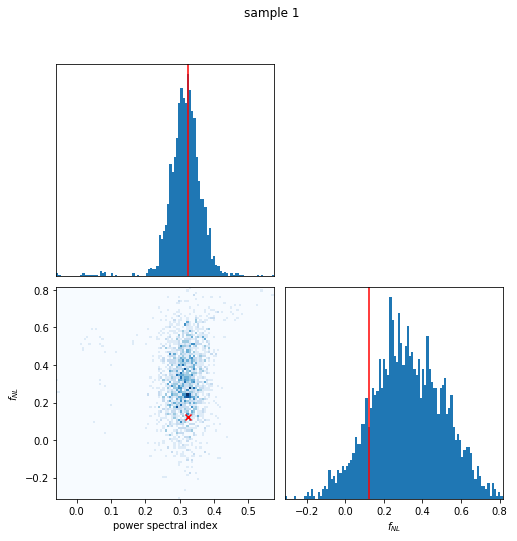

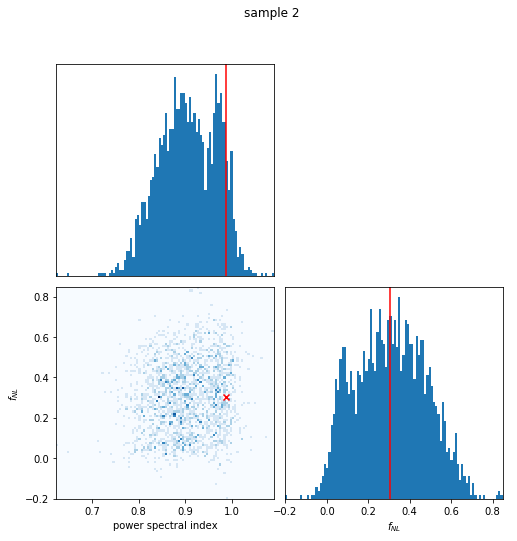

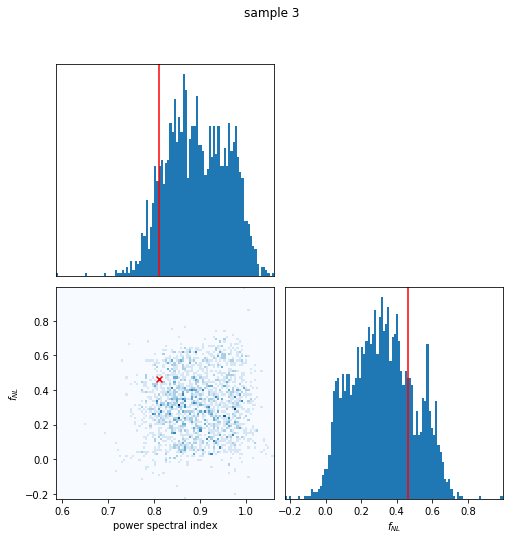

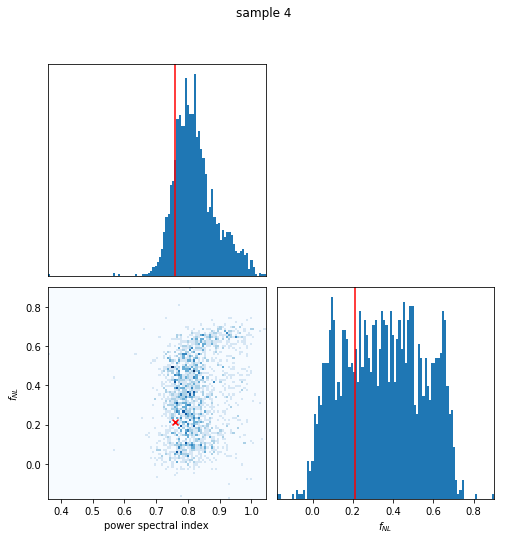

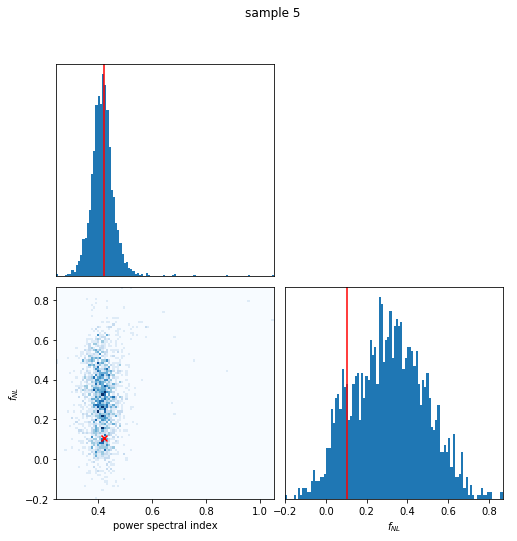

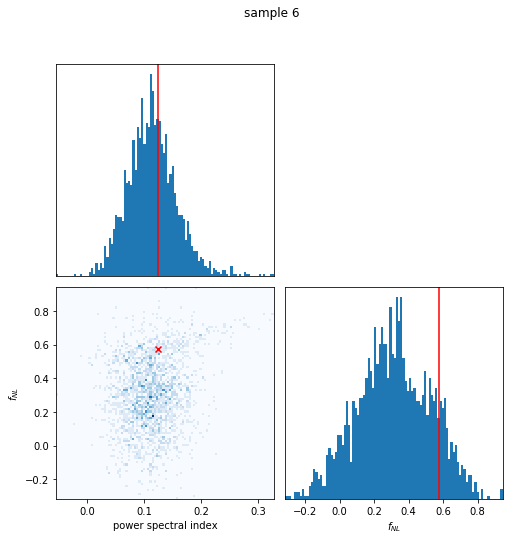

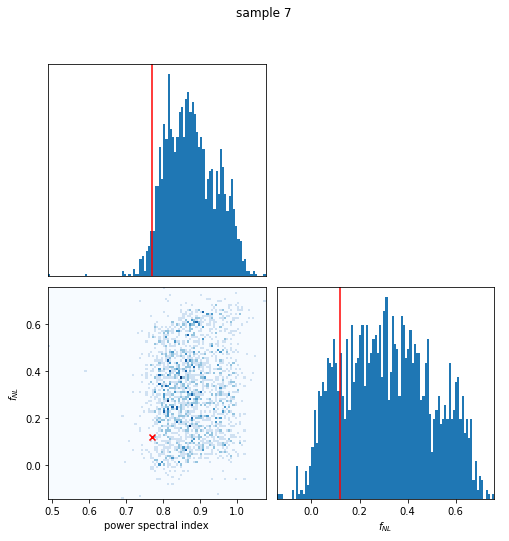

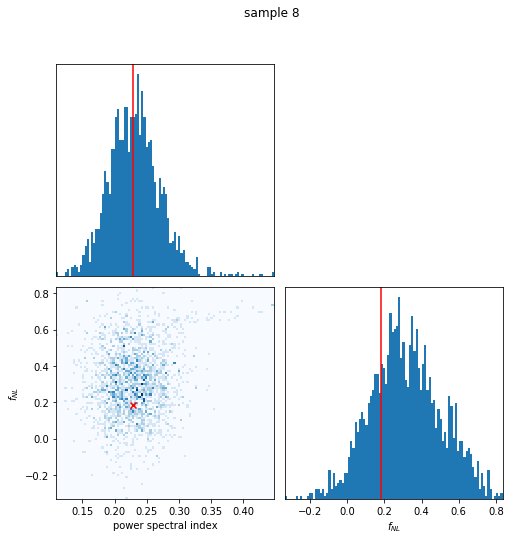

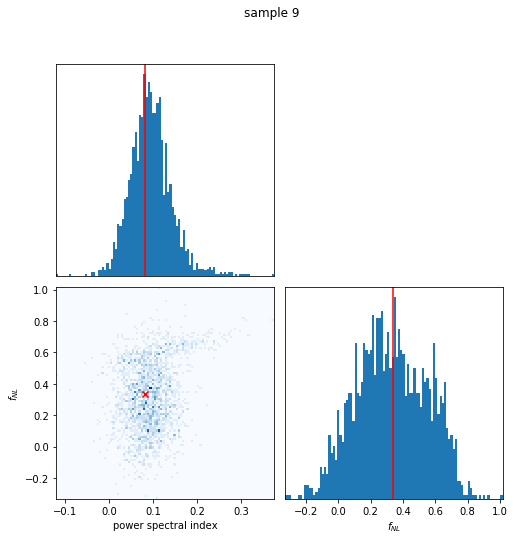

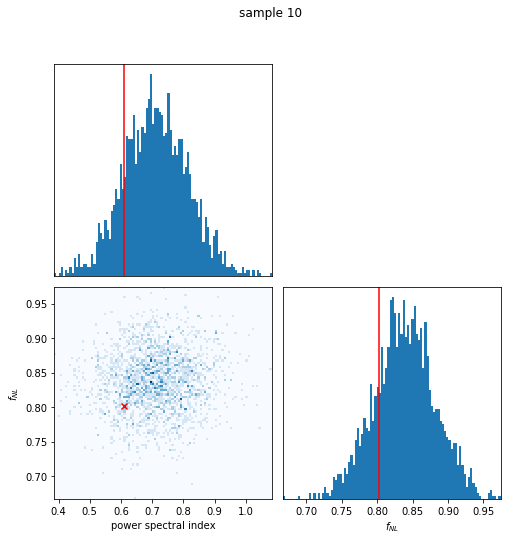

In [15]:
for i in range(10):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


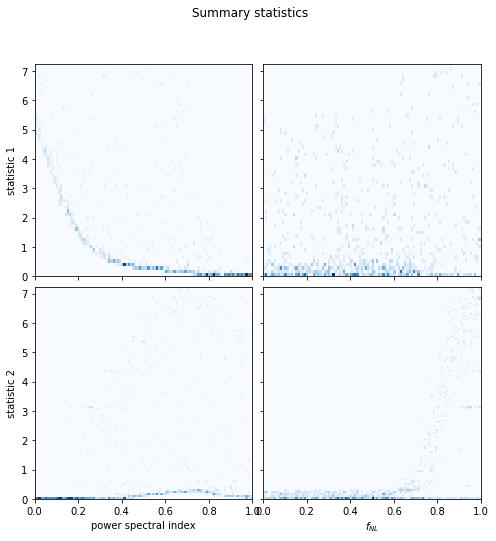

In [21]:
ps_model.plot_summaries(ps_test, p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


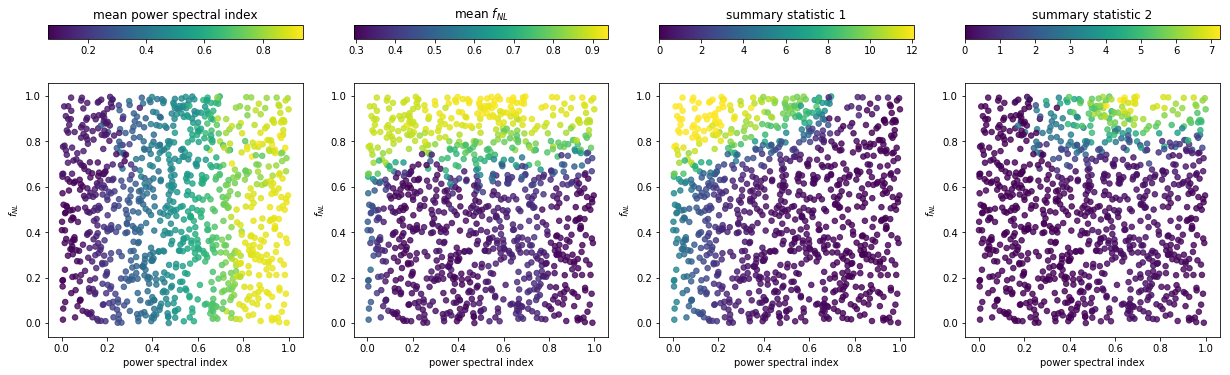

In [12]:
ps_model.plot_2d(ps_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlps1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


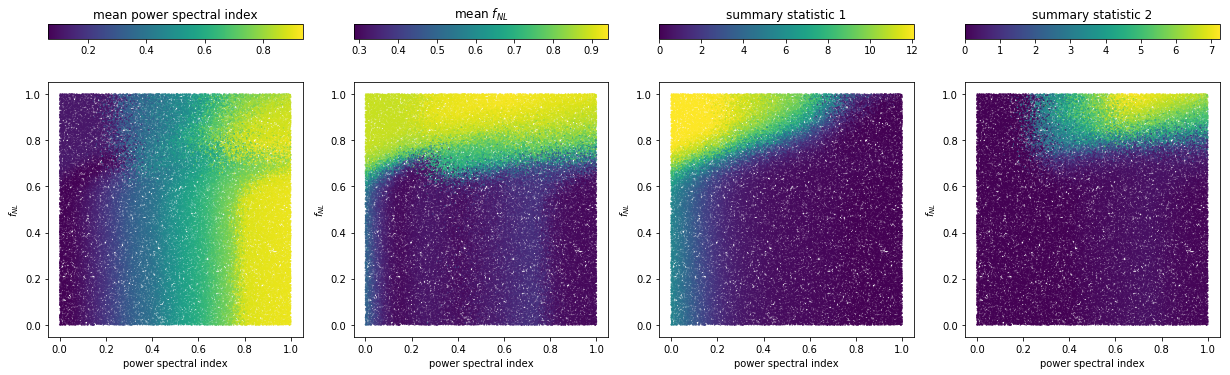

In [13]:
ps_model.plot_2d(ps_train,p_train)

In [19]:
def pdf(n,spec_ind,min_fnl):
    f_nls = linspace(min_fnl,1,n)
    colours = cm.copper((f_nls-min_fnl)/(1-min_fnl))
    unnorm = fast_gaussian(spectral_index(spec_ind*np.ones(n)), fnl=f_nls)
    norm = standardise_ps(unnorm, lambda x: 1)
    f,ax=subplots(2,1,figsize=(6,10))
    for i in range(n):
        ax[0].plot(*corners(unnorm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
        ax[1].plot(*corners(norm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
    ax[0].legend(frameon=False)
    ax[0].set_title("Original")
    ax[1].set_title("PS standardised")
    

interactive(pdf, n=(2,10),spec_ind=(0.,1),min_fnl=(0,0.7,0.1))

interactive(children=(IntSlider(value=6, description='n', max=10, min=2), FloatSlider(value=0.5, description='…

In [20]:
def pdf(n,spec_ind,min_fnl):
    f_nls = linspace(min_fnl,1,n)
    cmap = cm.copper
    normer =  Normalize(vmin=min_fnl,vmax=1)
    colours = cmap(normer(f_nls))
    unnorm = fast_gaussian(spectral_index(spec_ind*np.ones(n)), fnl=f_nls, constant_phase=True)
    norm = standardise_ps(unnorm, lambda x: 1)
    f,ax=subplots(3,1,figsize=(6,10),gridspec_kw={"height_ratios":(4,4,.5)})
    for i in range(n):
        ax[0].plot(*corners(unnorm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
        ax[1].plot(*corners(norm[i], 20), label="$f_{NL}=%.2f$"%f_nls[i],c=colours[i])
    #ax[0].legend(frameon=False)
    matplotlib.colorbar.ColorbarBase(ax[2],orientation="horizontal",cmap=cmap,norm=normer).set_label("$f_{NL}$")
    ax[0].set_title("Original")
    ax[1].set_title("PS standardised")
    

interactive(pdf, n=(2,11),spec_ind=(0.,1),min_fnl=(0,0.7,0.1))

interactive(children=(IntSlider(value=6, description='n', max=11, min=2), FloatSlider(value=0.5, description='…

In [14]:
bound = max(amax(abs(x_train)),amax(abs(x_test)))
nbins = 32
edges = np.linspace(-bound, bound, nbins+1)
pdf_train = array([np.histogram(x,edges)[0] for x in x_train])
pdf_test = array([np.histogram(x,edges)[0] for x in x_test])

In [15]:
pdf_model = LFI(["pdf"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnlpdf1')
pdf_model.train(training_fn_generator(pdf_train,p_train), max_steps=20*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnlpdf1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aacb20ba0f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Skipping training since max_steps has already saved.


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


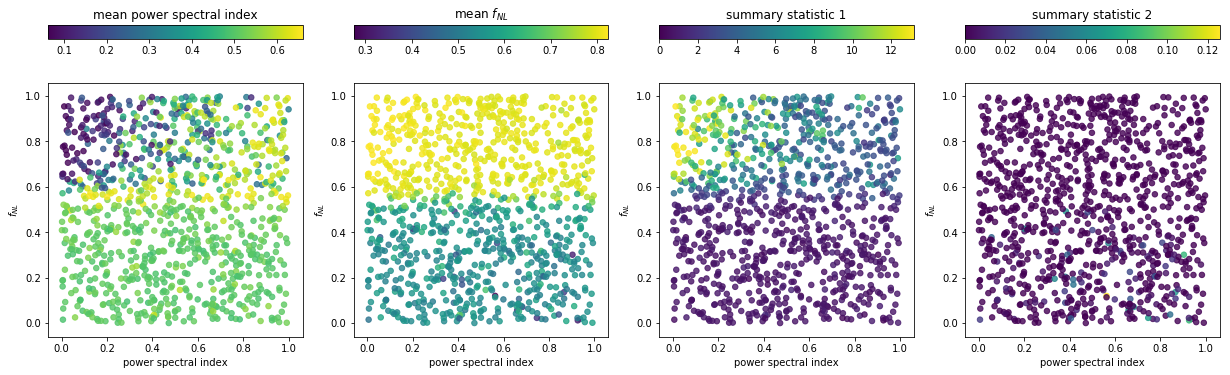

In [16]:
pdf_model.plot_2d(pdf_test,p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


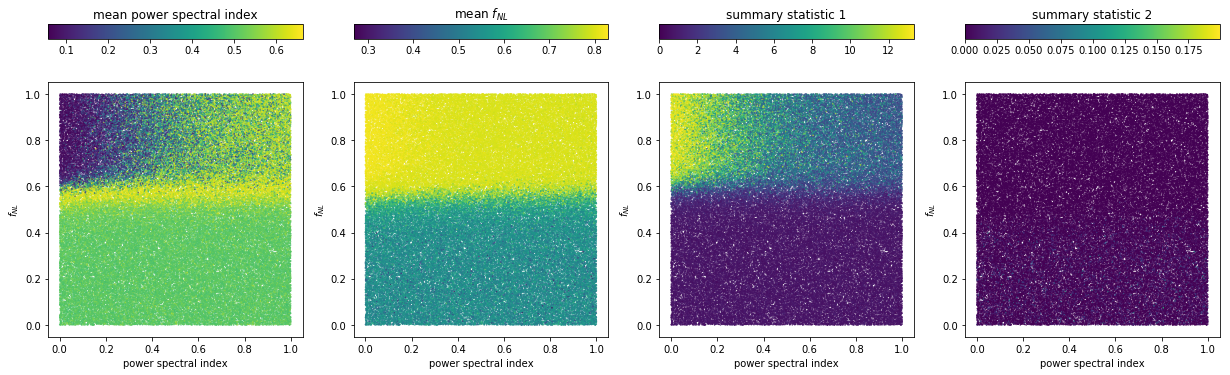

In [21]:
pdf_model.plot_2d(pdf_train,p_train)

In [31]:
post = pdf_model.plot_posteriors(pdf_test, p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlpdf1/model.ckpt-62500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


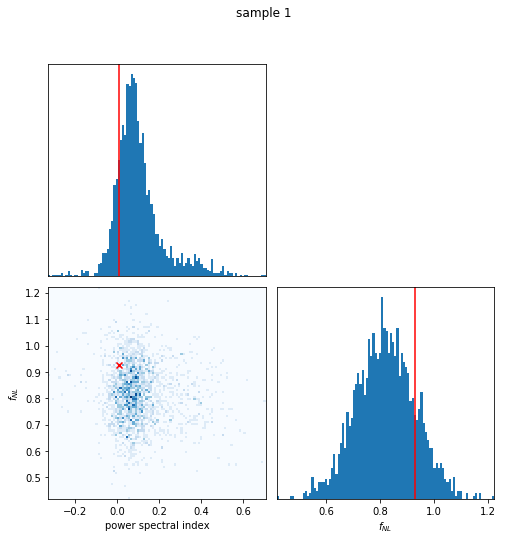

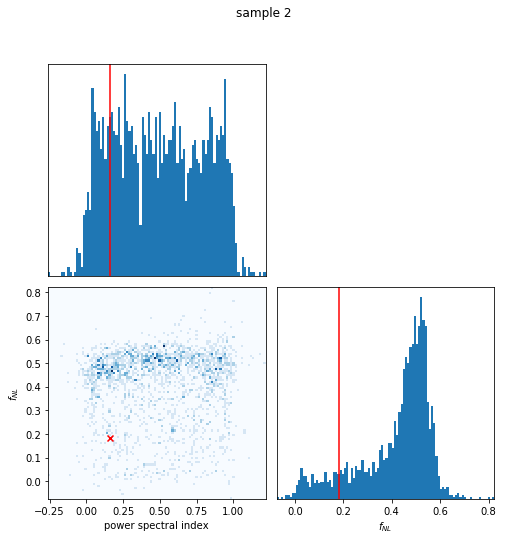

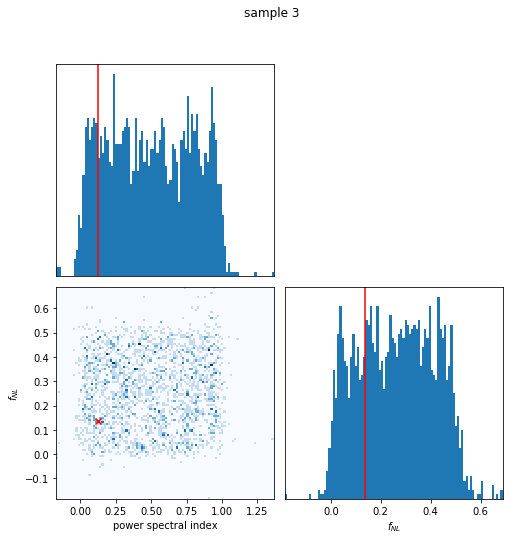

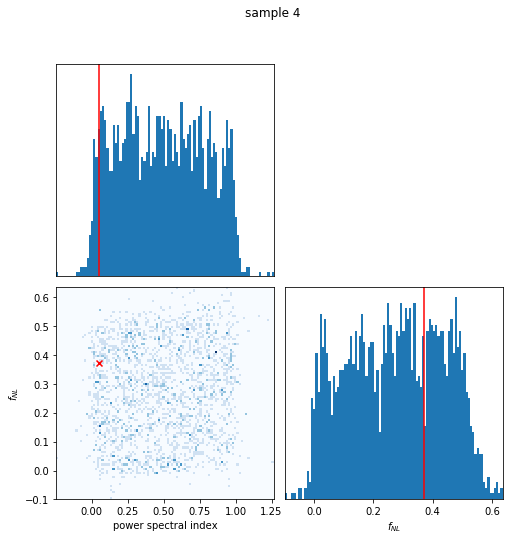

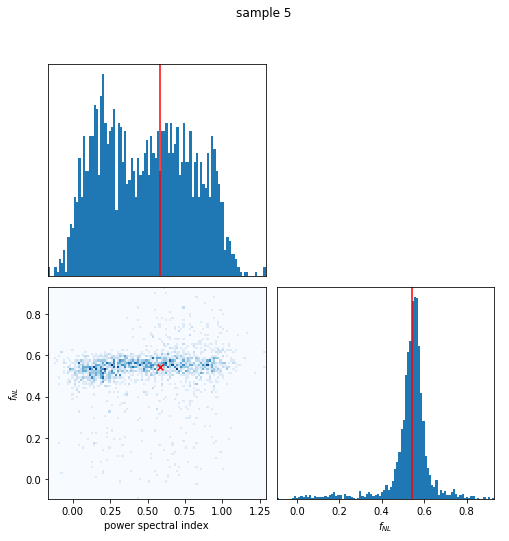

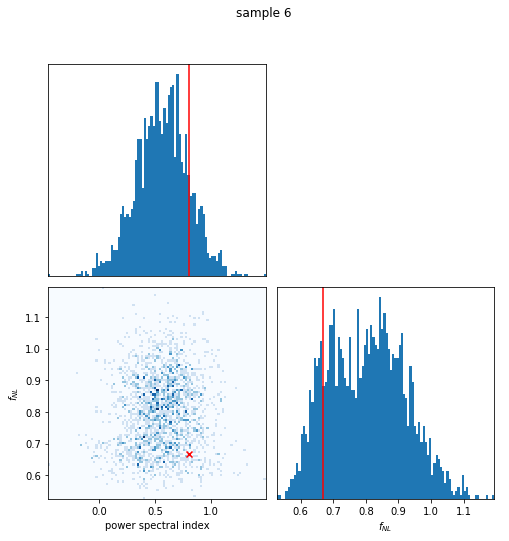

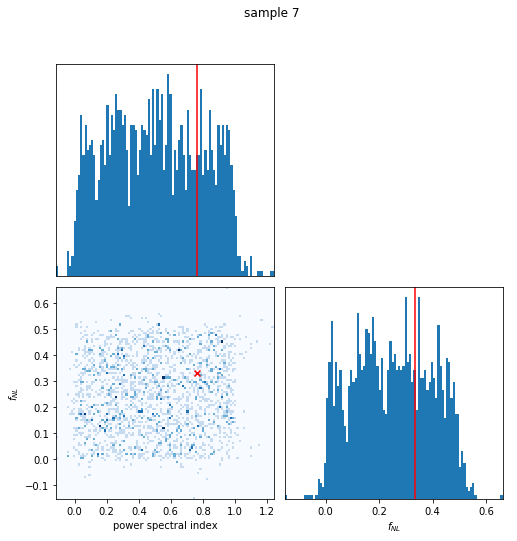

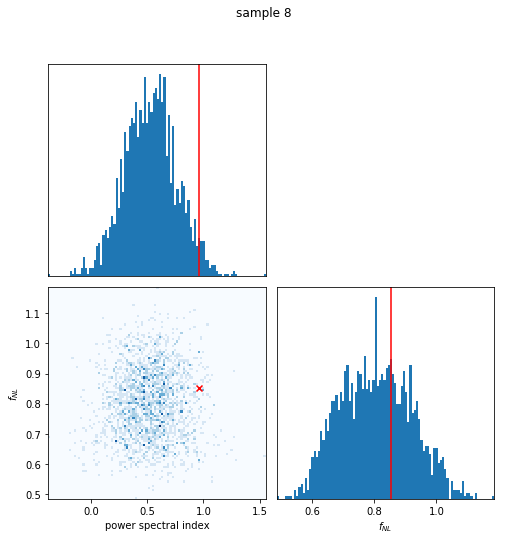

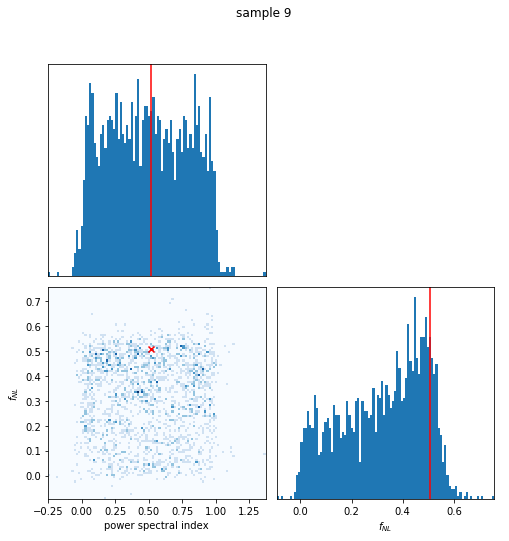

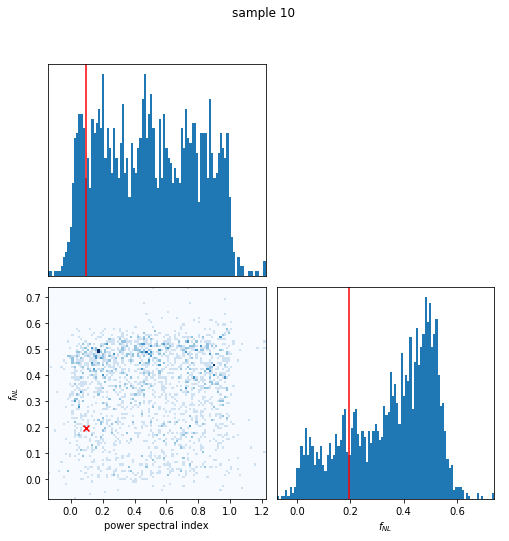

In [32]:
for i in range(10):
    next(post)